In [1]:
#导入相关的库
import seaborn as sns
import matplotlib.pyplot as plt

# 1 Seaborn库

# 1.3.1 Implot 回归图模型

In [3]:
# 确定图像的主题
sns.set_theme(style="ticks")
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [7]:
df.shape

(44, 3)

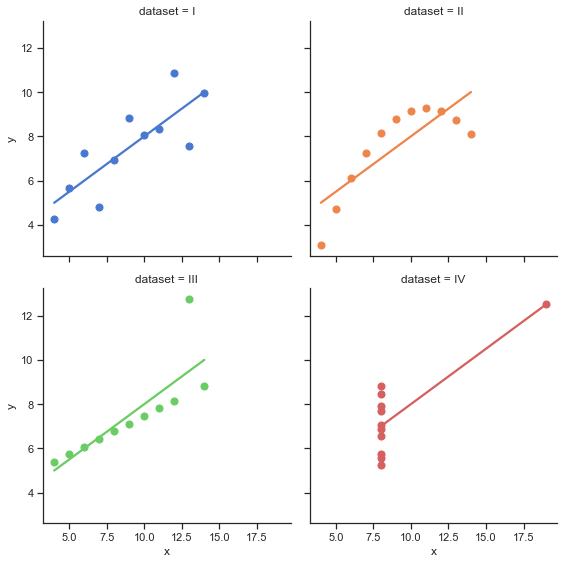

In [4]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})


In [8]:
#第二个例子
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


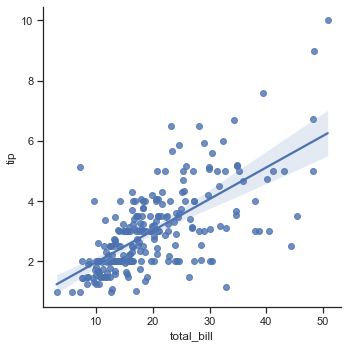

In [9]:
df = sns.lmplot(x = 'total_bill',y='tip',data = tips)
# 根据x，y所对应的列绘制图像

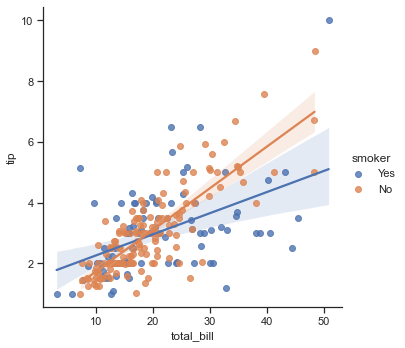

In [10]:
df = sns.lmplot(x = 'total_bill',y='tip',hue = 'smoker',data = tips)
#根据 某一列进行数据的分类然后分别进行拟合，如下图，根据smoker进行分类划分成抽烟和不抽烟两类，并提供了两条曲线

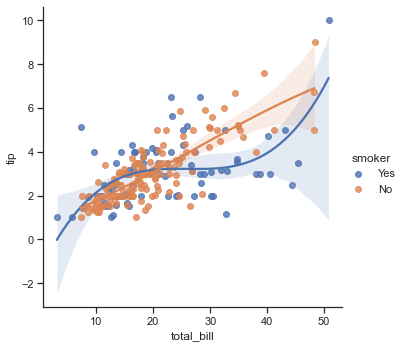

In [11]:
df = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,order=3)
# order == 3 就是指使用一个三次函数来拟合图像

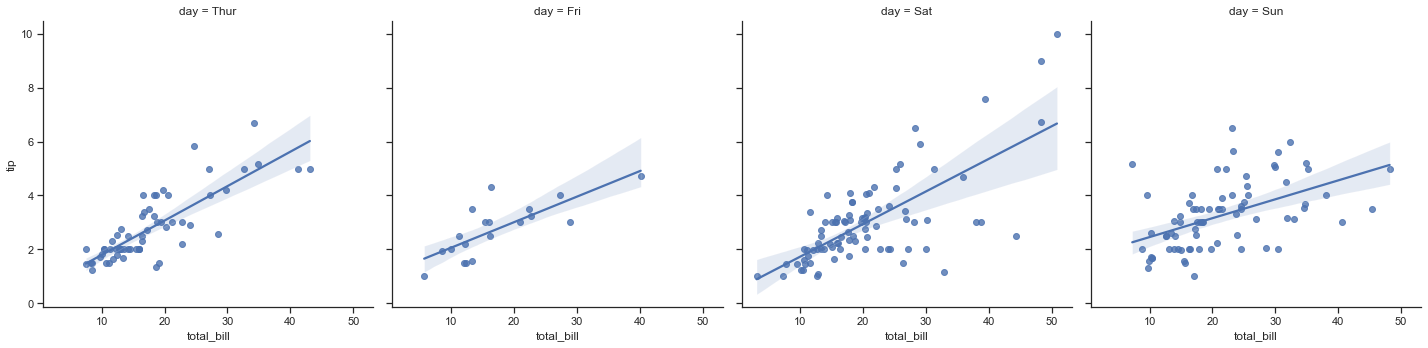

In [12]:
df = sns.lmplot(x="total_bill", y="tip",data=tips,col="day")

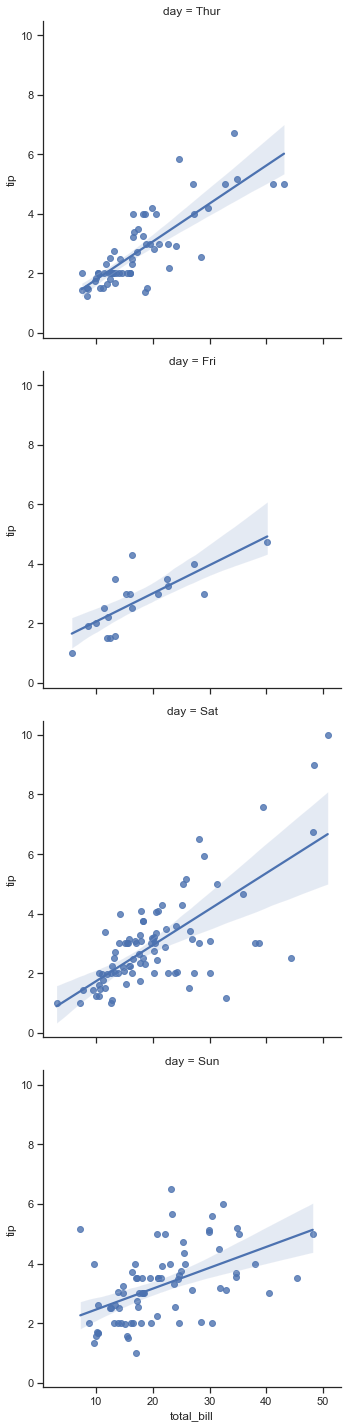

In [14]:
df = sns.lmplot(x="total_bill", y="tip",data=tips,row="day")
# col横着画，row竖着画

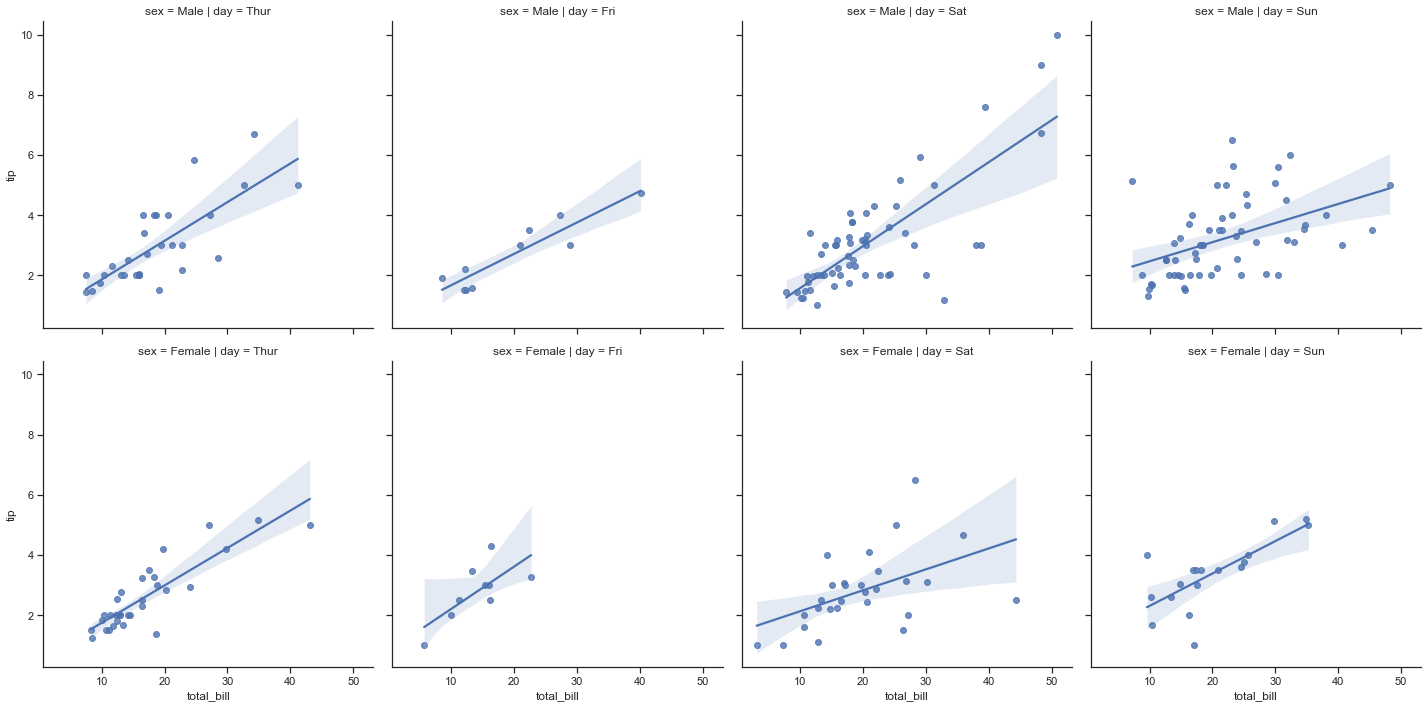

In [15]:
df = sns.lmplot(x="total_bill", y="tip",data=tips,row="sex",col="day")
#横着是不同的day，竖着对比是不同的sex

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


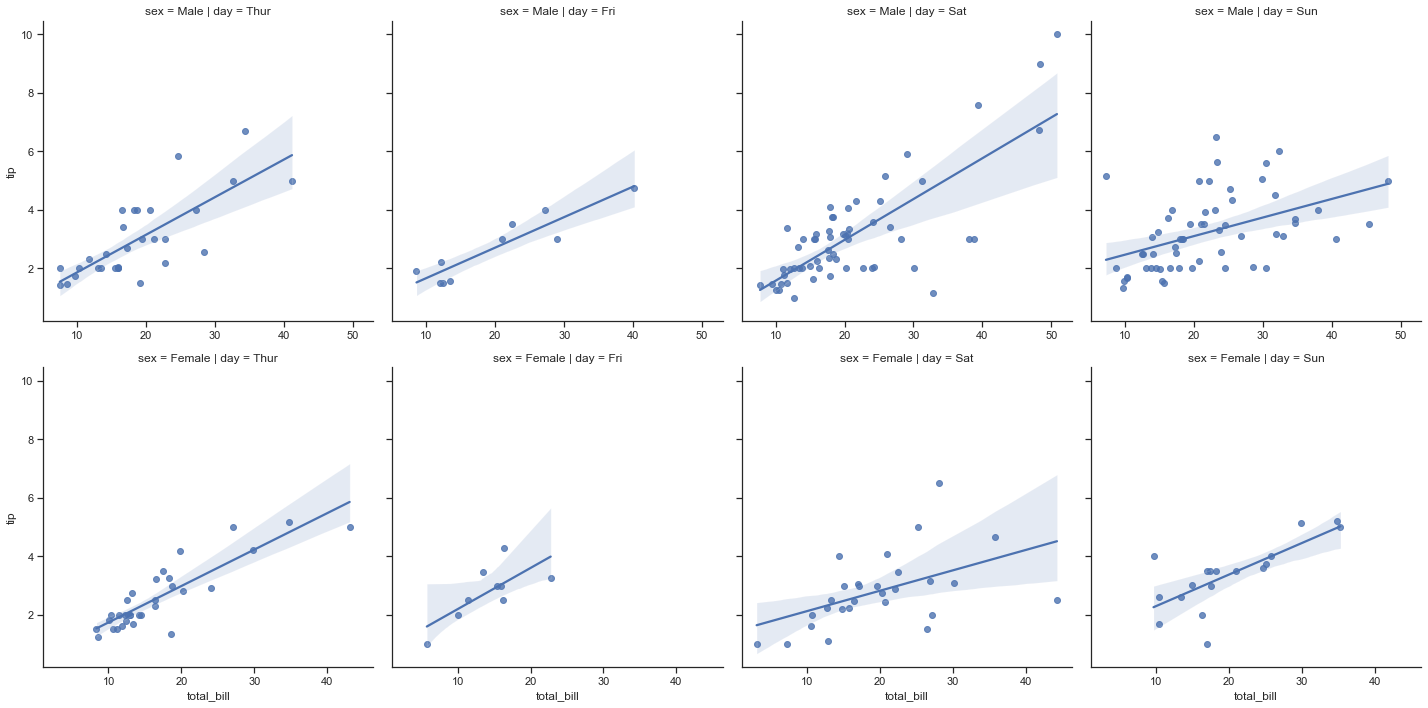

In [20]:
df = sns.lmplot(x="total_bill", y="tip",data=tips,row='sex',col="day",sharex='row')
# share_x =共享坐标轴尺度

# 1.3.2 Scatterplot（散点图）

In [22]:
tips = sns.load_dataset('tips')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

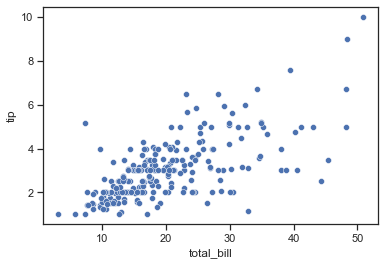

In [23]:
sns.scatterplot(x='total_bill', y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

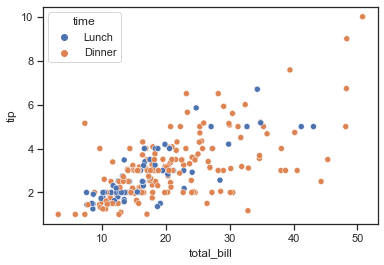

In [26]:
sns.scatterplot(x="total_bill", y="tip",hue="time",style="time" data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

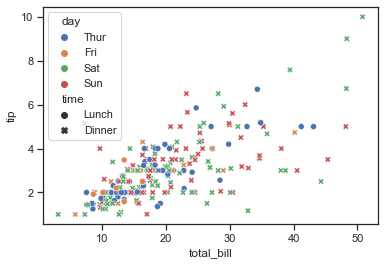

In [27]:
sns.scatterplot(x="total_bill", y="tip",hue="day", style="time", data=tips)
# style 可以让该列点之间进行区分

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

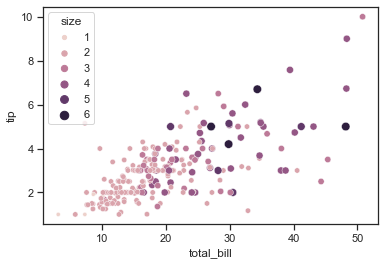

In [28]:
sns.scatterplot(x="total_bill", y="tip",hue="size", size="size",data=tips)
# Size 可以让不同的点之间大小不一，以便区分

# 1.3.3 Lineplot

In [43]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

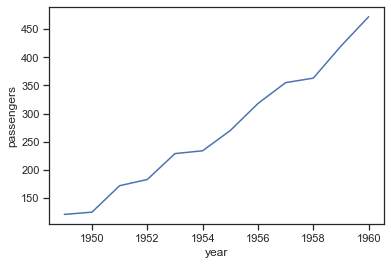

In [37]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

<AxesSubplot:xlabel='year'>

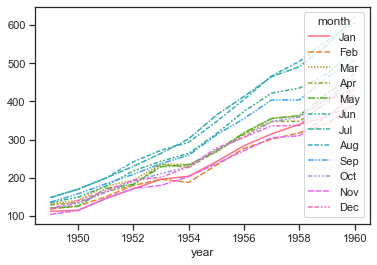

In [40]:
flights_wide = flights.pivot("year", "month", "passengers")
sns.lineplot(data=flights_wide)
#观察每个月份的旅客数量

In [45]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

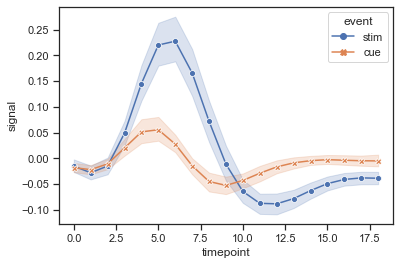

In [46]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)
#marker 可以把不同的数据点在图中进行标注

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

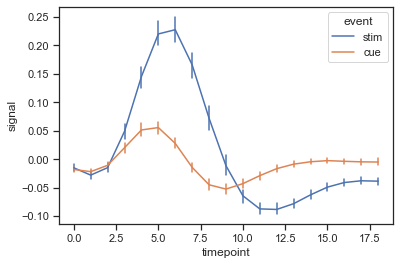

In [47]:
sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", ci=68
)
#在画图中，err_style={"bars","bands"},能够在点上画线段，以线段宽度显示计算的误差

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

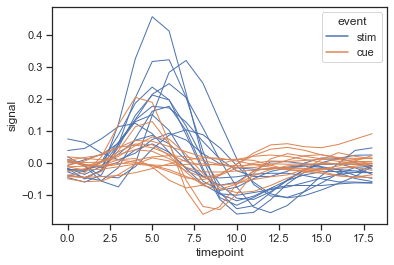

In [57]:
sns.lineplot(
    data=fmri.query("region == 'frontal'"),
    x="timepoint", y="signal", hue="event", units="subject",
    estimator=None, lw=1,
)

<AxesSubplot:>

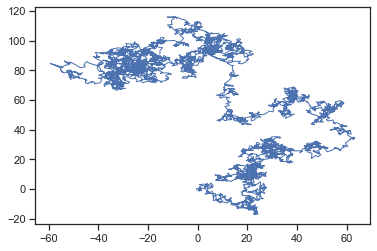

In [52]:
import numpy as np
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)
# sort 默认是按照x（横坐标排序），如果False了就不是函数了，而是数据分布

# 1.3.4 Replot

In [58]:
tips= sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


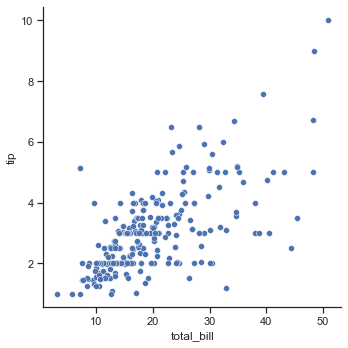

In [59]:
sns.relplot(x='total_bill', y='tip', data=tips)

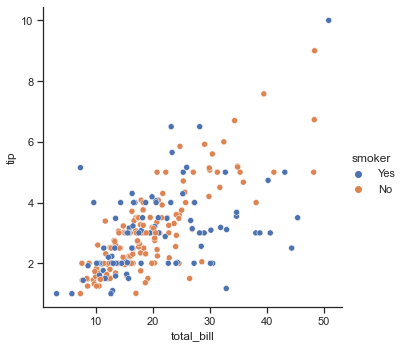

In [60]:
sns.relplot(x='total_bill', y='tip',  data=tips, hue='smoker')

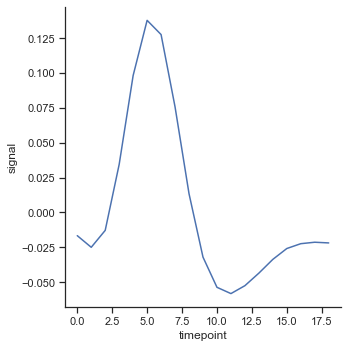

In [61]:
sns.relplot(x="timepoint", y="signal", data=fmri, kind="line", ci=None)
# ci = 'None'不显示聚合后的阴影

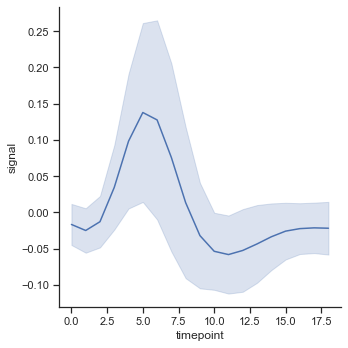

In [62]:
sns.relplot(x="timepoint", y="signal", data=fmri, kind="line", ci="sd")
#ci = 'sd'

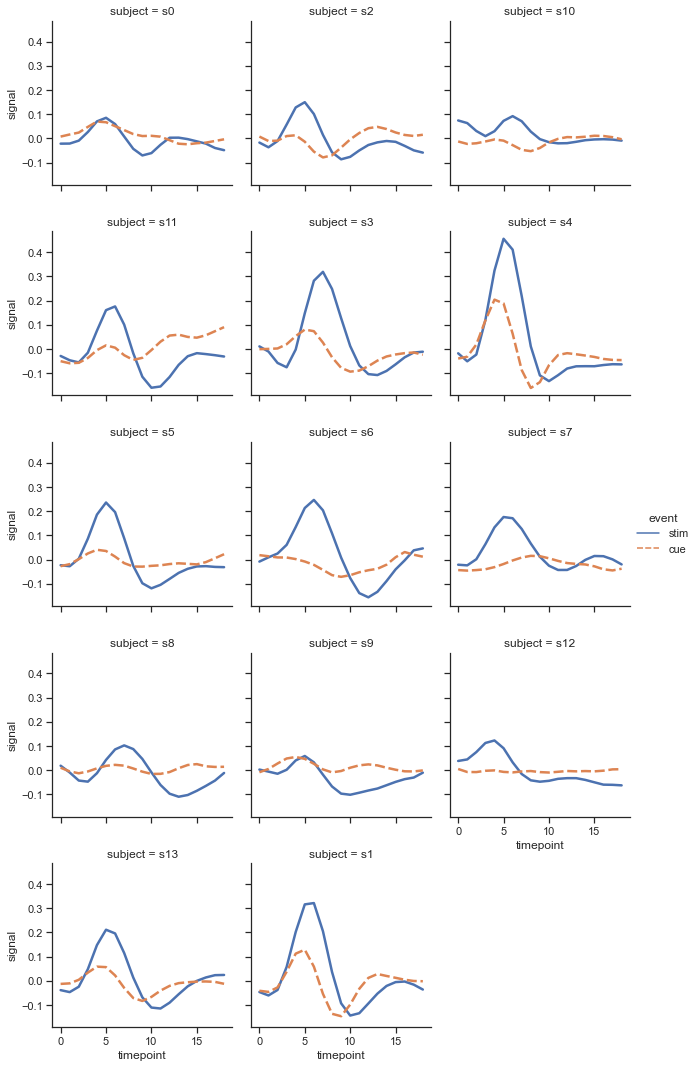

In [63]:
sns.relplot(x="timepoint", y="signal", 
            hue="event", style="event",
            col="subject", col_wrap=3, 
            data=fmri.query("region=='frontal'"), 
            kind="line",
            linewidth=2.5,
            aspect=1, #长宽比，该值越大图片越方
            height=3)

# 1.3.5 箱型图

In [66]:
import pandas as pd
from sklearn.datasets import load_iris
data = pd.DataFrame(load_iris().data,columns = load_iris().feature_names)

<AxesSubplot:xlabel='sepal length (cm)'>

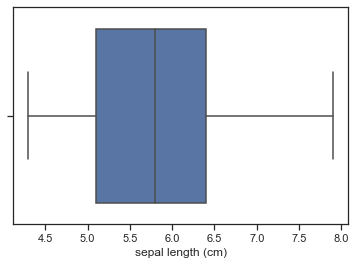

In [69]:
data['sample'] = load_iris().target
sns.boxplot(x=data['sepal length (cm)'],data = data)
# 横着导入数据的分布，以sepal length作为横坐标

<AxesSubplot:ylabel='sepal length (cm)'>

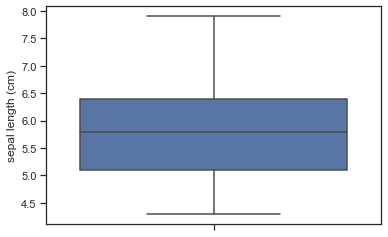

In [70]:
sns.boxplot(y=data['sepal length (cm)'],data = data)
# 竖着导入数据的分布，以sepal length作为纵坐标

<AxesSubplot:>

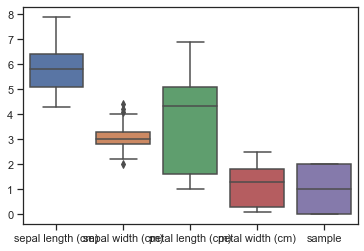

In [71]:
sns.boxplot(data = data)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

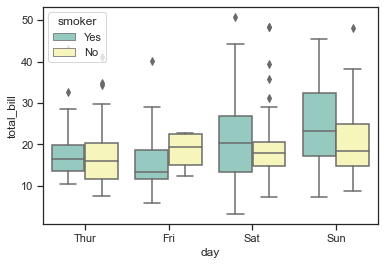

In [72]:
sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

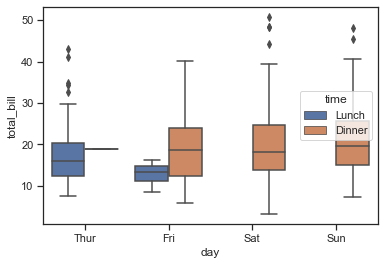

In [73]:
sns.boxplot(x="day", y="total_bill", hue="time",
                 data=tips, linewidth=1.5)

# 1.3.7 Violinplot

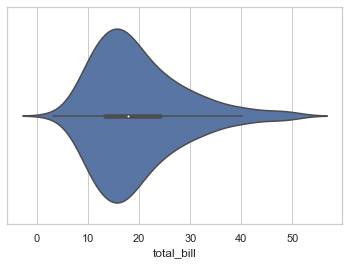

In [75]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x=tips["total_bill"])

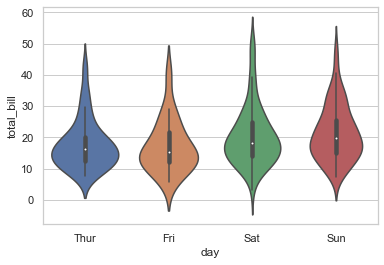

In [76]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

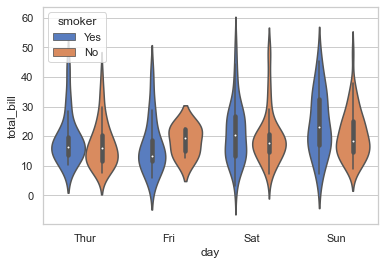

In [77]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted")

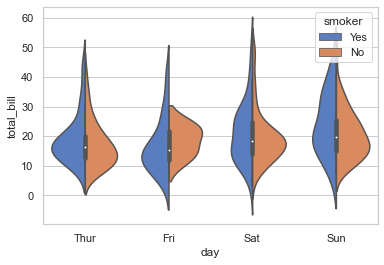

In [79]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted", split=True)
# split 左右对半分割，可以很好的对比数据的分布

# 1.3.8 JointPlot

In [85]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


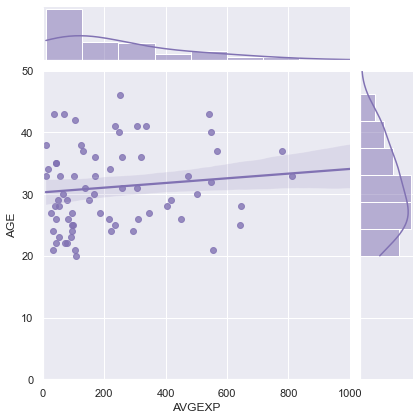

In [89]:
import statsmodels.api as sm
import seaborn as sns
sns.set(style="darkgrid")
data = sm.datasets.ccard.load_pandas().data
g = sns.jointplot('AVGEXP', 'AGE', data=data, kind="reg",
                 xlim=(0, 1000), ylim=(0, 50), color="m")

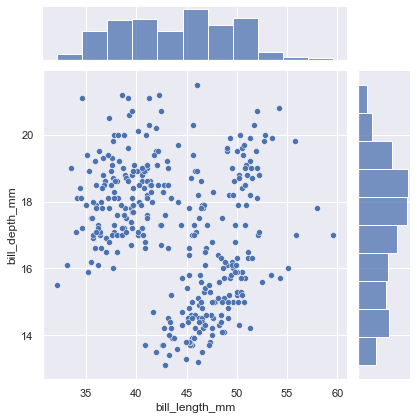

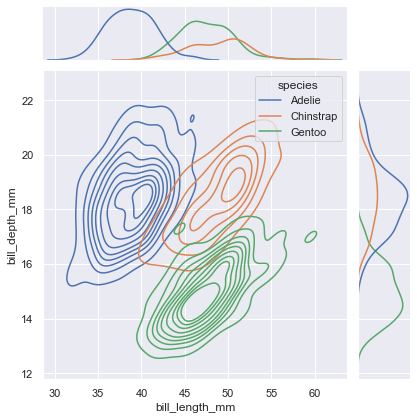

In [92]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

# 1.3.9 histplot(柱状图)

In [98]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

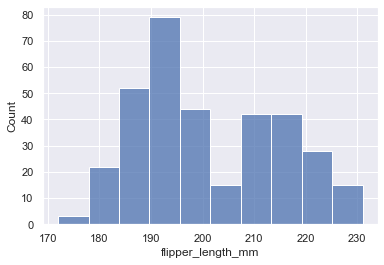

In [97]:
sns.histplot(data=penguins, x="flipper_length_mm")

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

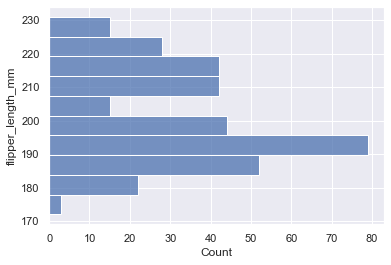

In [94]:
sns.histplot(data=penguins, y="flipper_length_mm")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

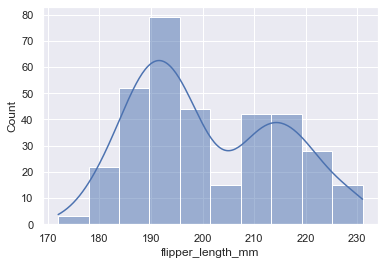

In [95]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

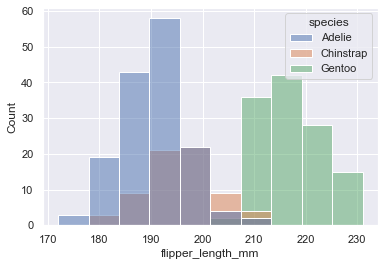

In [96]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

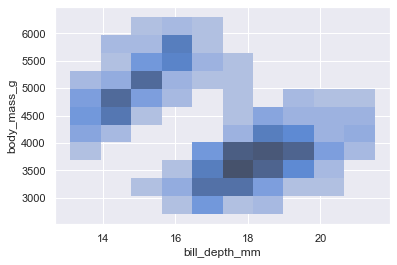

In [99]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")
# 当x，y都被赋值的时候，那就显示成了热度图（heatmap）

<AxesSubplot:xlabel='year', ylabel='distance'>

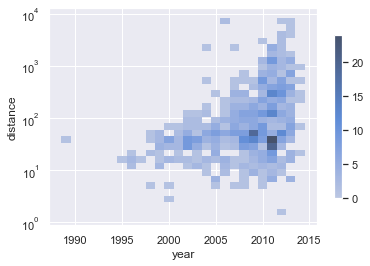

In [101]:
planets = sns.load_dataset("planets")
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)

# 1.3.10 FacetGrid

#### 这个图非常的灵活，内容可以嵌套多种画法。所以，这里就不一一列举了，提供一个链接，可以参考链接里面的效果，自己修改即可：http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

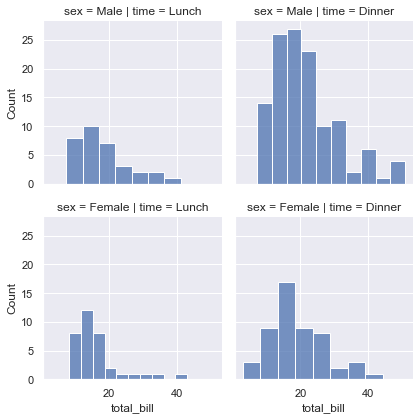

In [102]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

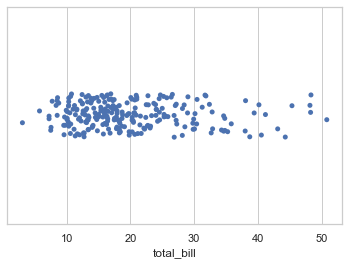

In [104]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.stripplot(x=tips["total_bill"])

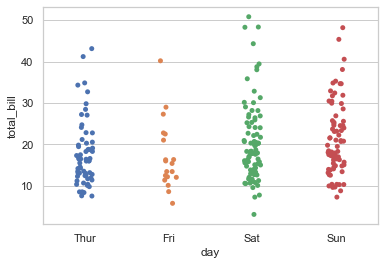

In [105]:
ax = sns.stripplot(x="day", y="total_bill", data=tips)

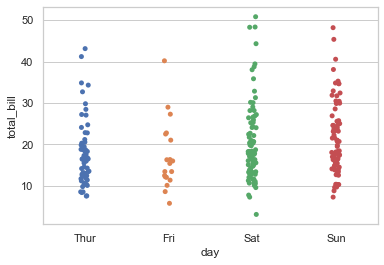

In [106]:
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

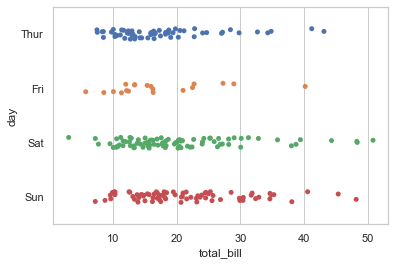

In [107]:
ax = sns.stripplot(x="total_bill", y="day", data=tips)

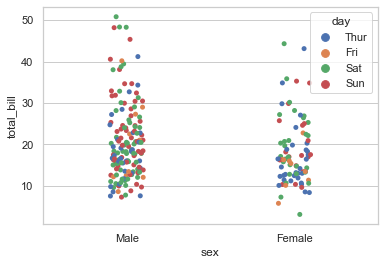

In [108]:
ax = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips)

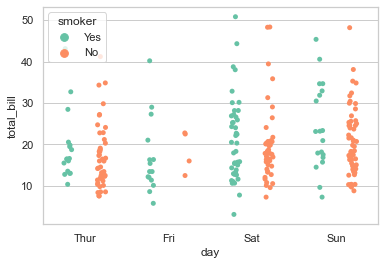

In [109]:
ax = sns.stripplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set2", dodge=True)

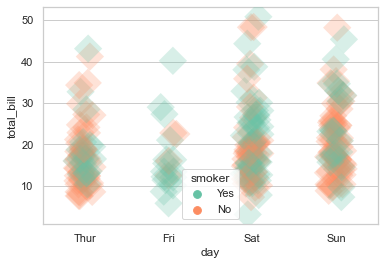

In [110]:
ax =  sns.stripplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)

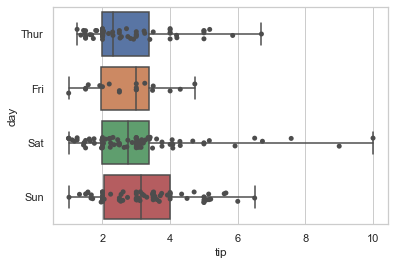

In [111]:
import numpy as np
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.stripplot(x="tip", y="day", data=tips, color=".3")

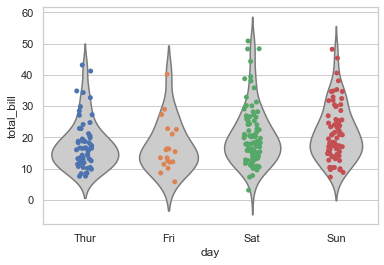

In [112]:
ax = sns.violinplot(x="day", y="total_bill", data=tips,
                    inner=None, color=".8")
ax = sns.stripplot(x="day", y="total_bill", data=tips)

# 1.3.12 Kdeplot

<AxesSubplot:ylabel='Density'>

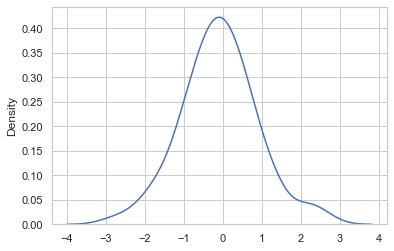

In [117]:
x=np.random.randn(100)  #随机生成100个符合正态分布的数
sns.kdeplot(x)

<AxesSubplot:ylabel='Density'>

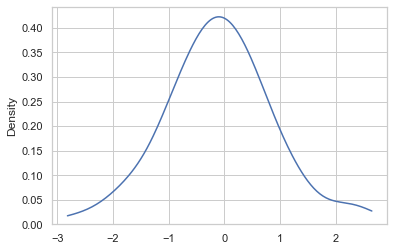

In [122]:
sns.kdeplot(x,cut=0)

<AxesSubplot:ylabel='Density'>

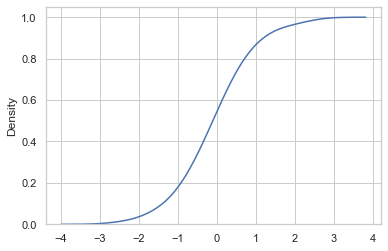

In [123]:
sns.kdeplot(x,cumulative=True)
# cumulative 可以观察积累概率的分布

<AxesSubplot:ylabel='Density'>

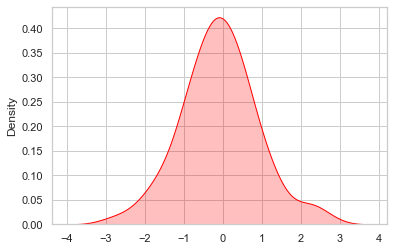

In [126]:
sns.kdeplot(x,shade=True,color='red')
# shade 阴影下面积标注

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

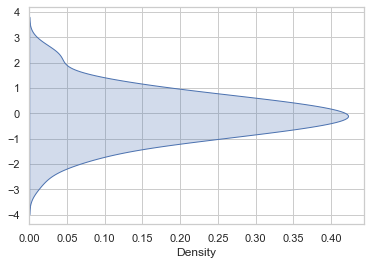

In [128]:
sns.kdeplot(x,vertical=True,shade= True)
# vertical 以y轴为基准画图

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

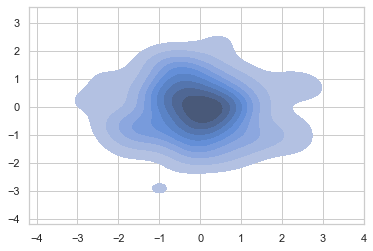

In [129]:
y = np.random.randn(100)
sns.kdeplot(x,y,shade=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

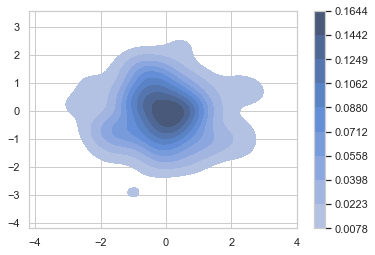

In [130]:
sns.kdeplot(x,y,shade=True,cbar=True)
# cbar 添加一个颜色棒

# 1.3.13 Rugplot

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

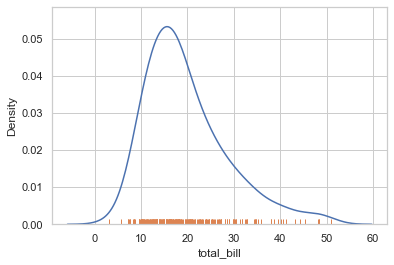

In [133]:
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

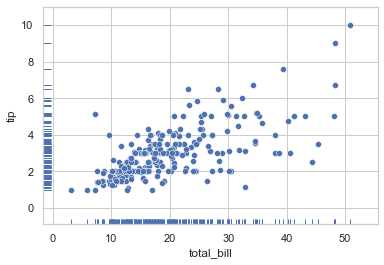

In [134]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

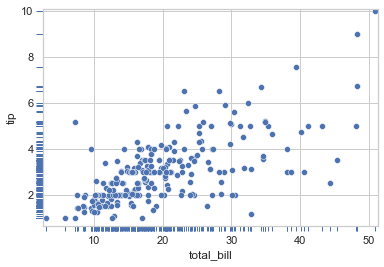

In [135]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=-.02, clip_on=False)

# 1.3.14 Distplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


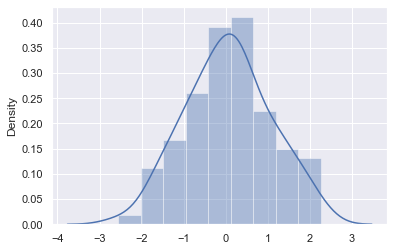

In [136]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


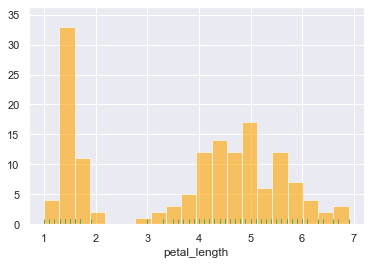

In [139]:
iris = sns.load_dataset('iris')
ax = sns.distplot(iris.petal_length,color='r',
                 rug=True,
                 kde=False,
                 bins=20,
                 fit=None,
                 hist_kws={'alpha':0.6,'color':'orange'},
                 rug_kws={'color':'g'},
                 norm_hist=False)

# 1.3.15 Boxenplot

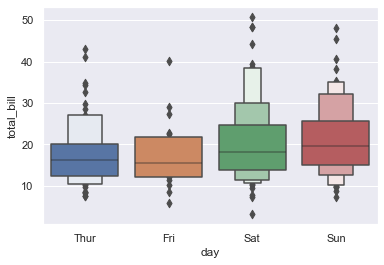

In [140]:
ax = sns.boxenplot(x="day", y="total_bill", data=tips)

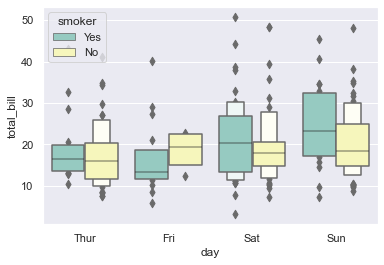

In [141]:
ax = sns.boxenplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set3")

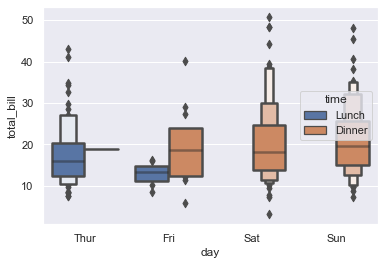

In [142]:
ax = sns.boxenplot(x="day", y="total_bill", hue="time",
                   data=tips, linewidth=2.5)

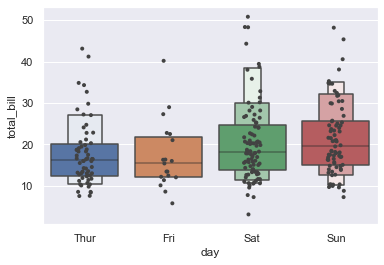

In [143]:
ax = sns.boxenplot(x="day", y="total_bill", data=tips,
                   showfliers=False)
ax = sns.stripplot(x="day", y="total_bill", data=tips,
                   size=4, color=".26")

# 1.3.16 heatmap 热度图

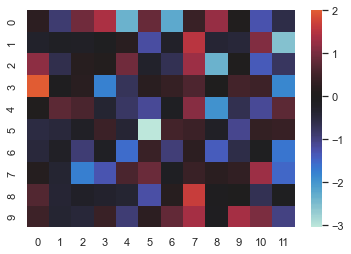

In [146]:
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)